# Assignment


You have already picked out the dataset you want to work with. If you have not, you can use this dataset [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/J6BNrGi_wv8AAAAC/funny-meme.gif)


In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [465]:
df = pd.read_csv('SampleSuperstore.csv')

In [489]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,4205,1,0.00,5740
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,5219,2,0.00,6962
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,969,1,0.00,3301
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,5392,4,0.45,75
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,1360,1,0.20,2257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,1482,2,0.20,2684
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,3029,1,0.00,4467
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,4193,1,0.20,4766
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,1644,3,0.00,4244


In [490]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,2575.845908,2.789574,0.156203,3659.327096
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,1647.651858,2.225110,0.206452,1993.873504
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,1114.000000,1.000000,0.000000,2043.250000
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,2388.500000,2.000000,0.200000,3621.500000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,3953.000000,4.000000,0.200000,5320.000000


array([[<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

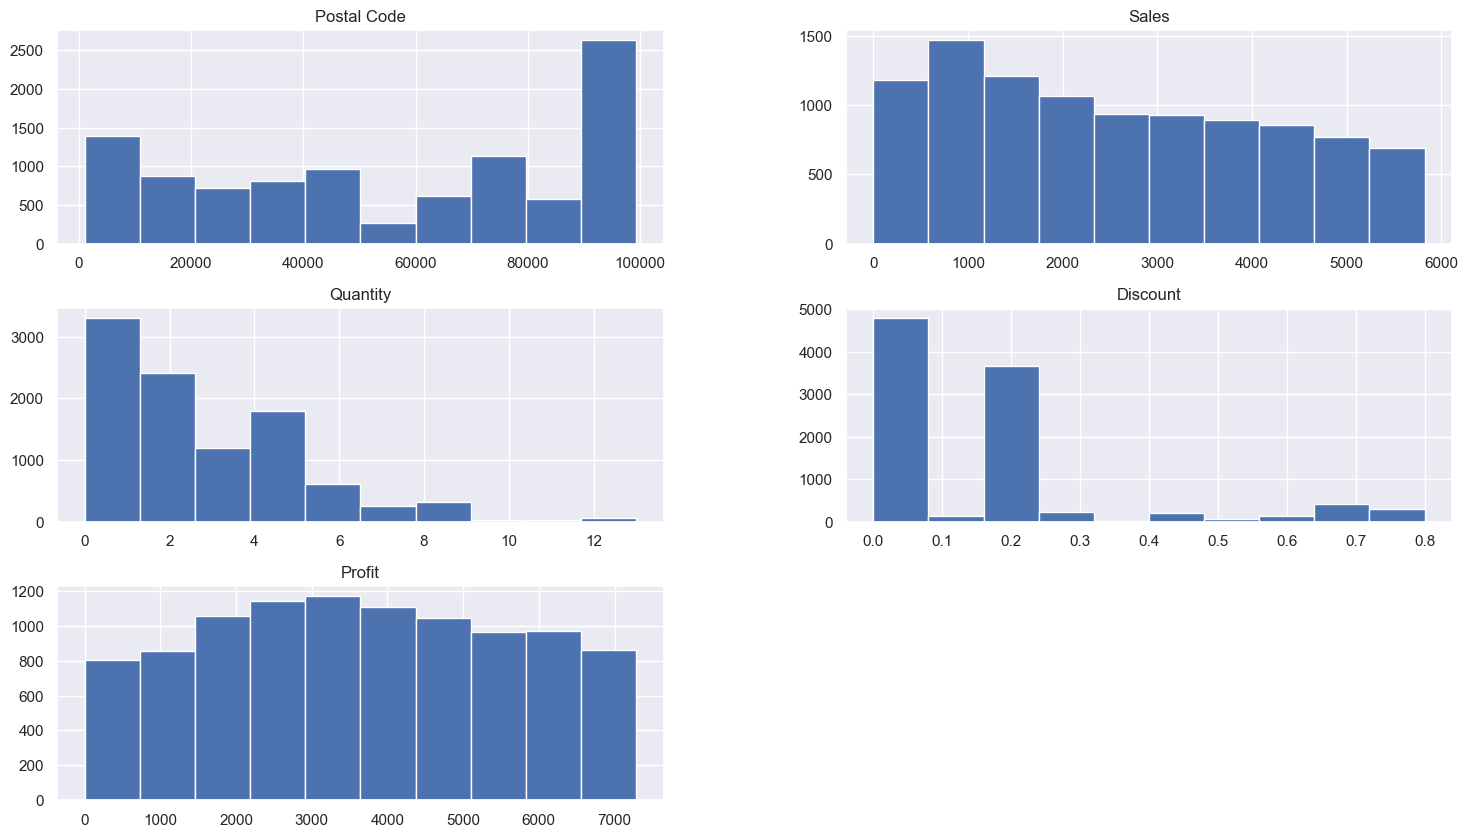

In [491]:
df.hist(bins=10, figsize=(18,10))

/var/folders/4t/flkqq_hn3474p78hfyx8dlz00000gn/T/ipykernel_10161/1608431336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

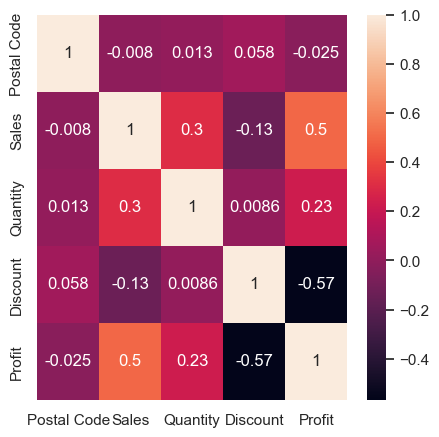

In [492]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

# EDA

# Analysis based on Ship Mode

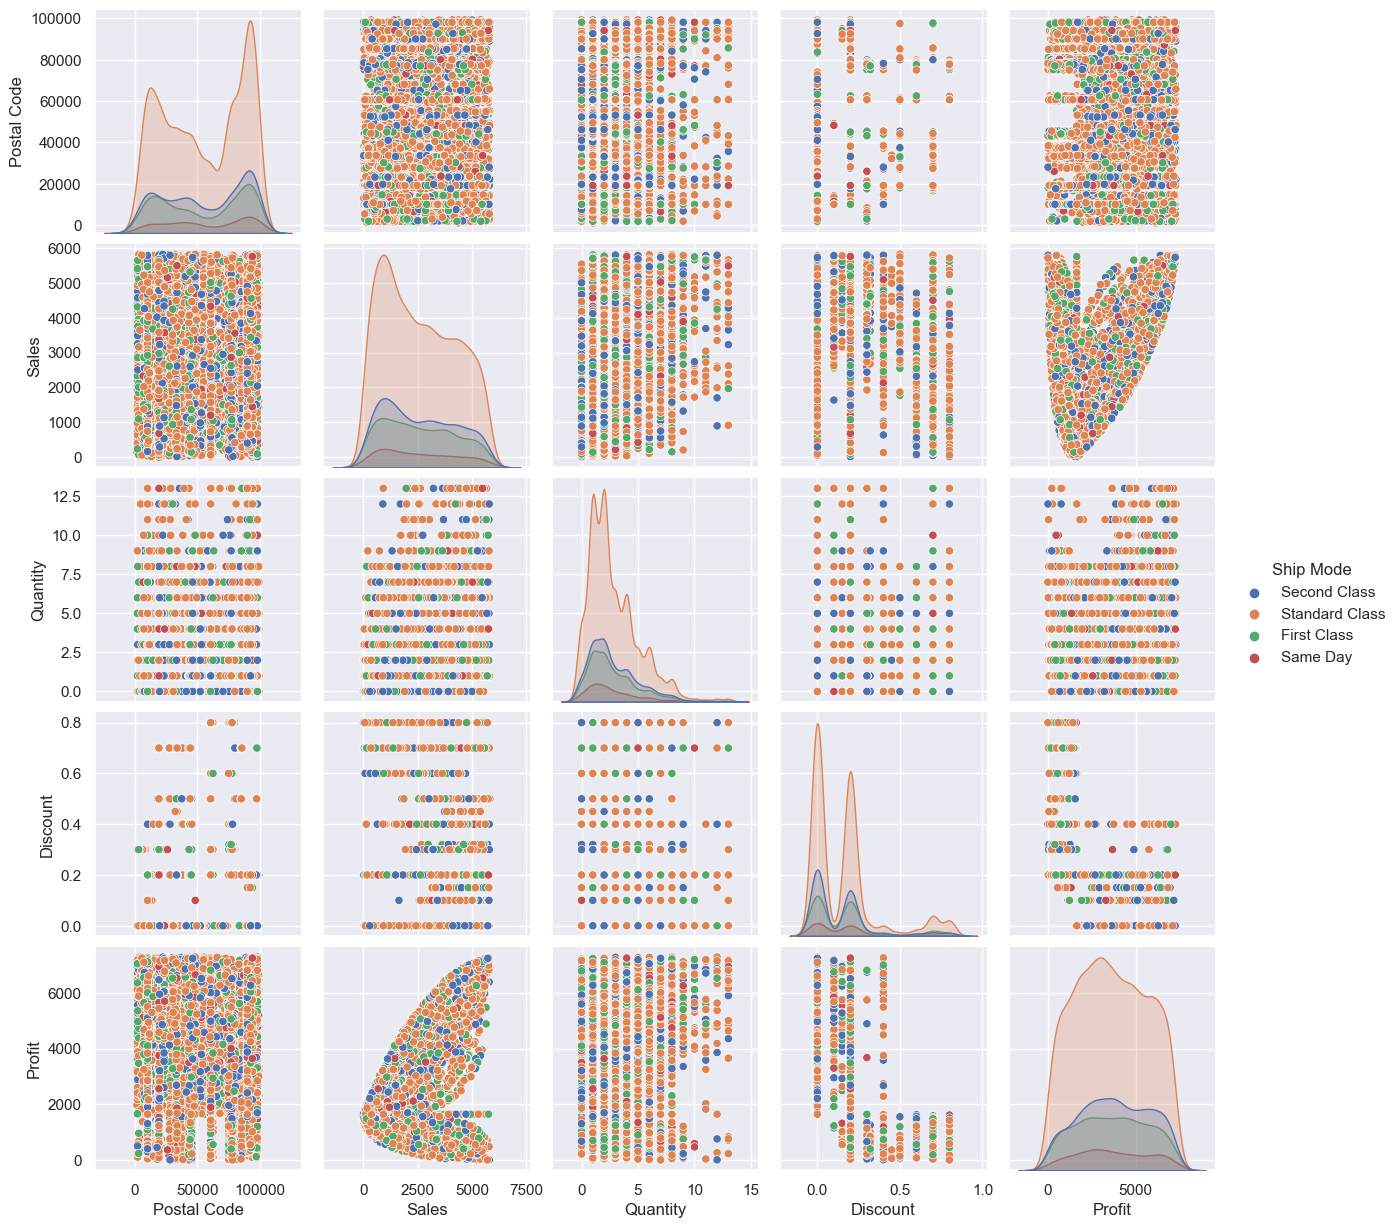

In [493]:
sns.pairplot(df, hue='Ship Mode')

<Axes: xlabel='Ship Mode', ylabel='count'>

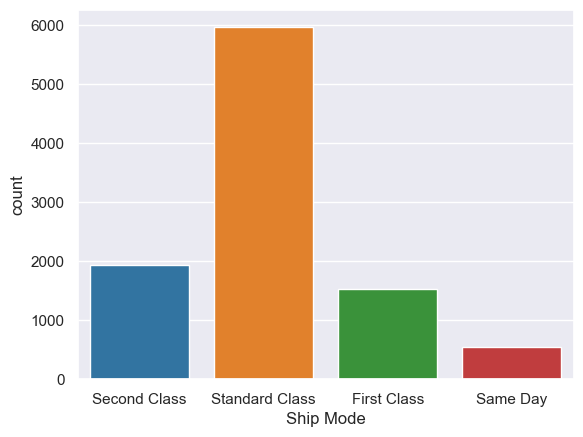

In [494]:
sns.countplot(x='Ship Mode', data=df, palette='tab10')

In [495]:
data_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Profit', 'Discount']].mean()
data_shipmode

,Sales,Profit,Discount
Ship Mode,,,
First Class,2584.609233,3647.819896,0.164610
Same Day,2583.953959,3693.042357,0.152394
Second Class,2616.283290,3788.421080,0.138895
Standard Class,2559.671079,3617.152647,0.160023


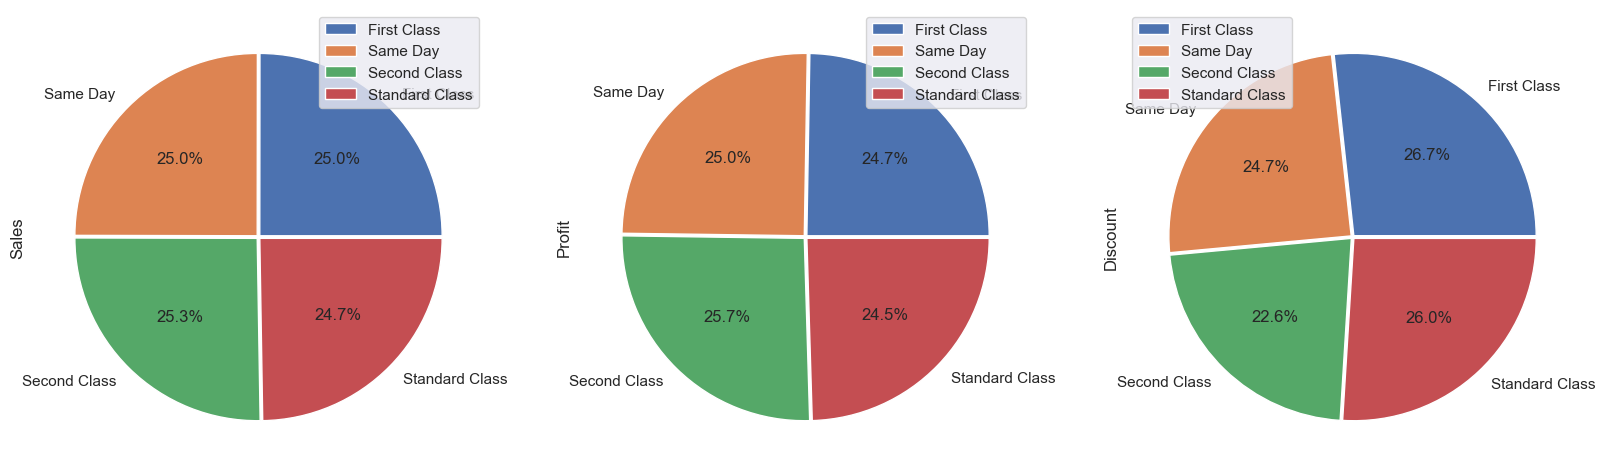

In [496]:
data_shipmode.plot.pie(subplots=True, figsize=(20,10), labels=data_shipmode.index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01))
plt.show()

<Axes: xlabel='Ship Mode'>

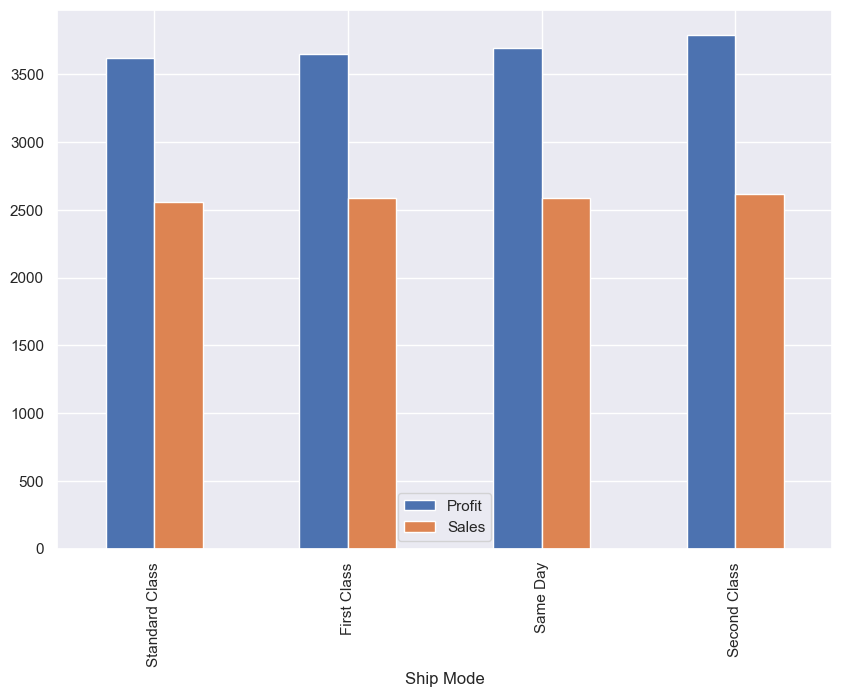

In [497]:
data_shipmode.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(10,7))

In [498]:
data_shipmode.sum(axis=0)

Sales       10344.517562
Profit      14746.435980
Discount        0.615922
dtype: float64

In [499]:
data_shipmode['Sales%'] = data_shipmode['Sales']/9.285
data_shipmode['Profit%'] = data_shipmode['Profit']/1.181

In [500]:
data_shipmode.sort_values('Profit%')


,Sales,Profit,Discount,Sales%,Profit%
Ship Mode,,,,,
Standard Class,2559.671079,3617.152647,0.160023,275.678091,3062.788016
First Class,2584.609233,3647.819896,0.164610,278.363945,3088.755204
Same Day,2583.953959,3693.042357,0.152394,278.293372,3127.046873
Second Class,2616.283290,3788.421080,0.138895,281.775260,3207.807857


Sales
Lowest sales: Standard Class(24.51%)

Highest sales: Same Day(25.46%)

Profit
Lowest profit: Standard Class(23.28%)

Highest profit: First class(26.96%)

Though there is very little differences between the classes, still, maximum and minimum can be ascertained on seeing these analysis.

# Analysis based on segment

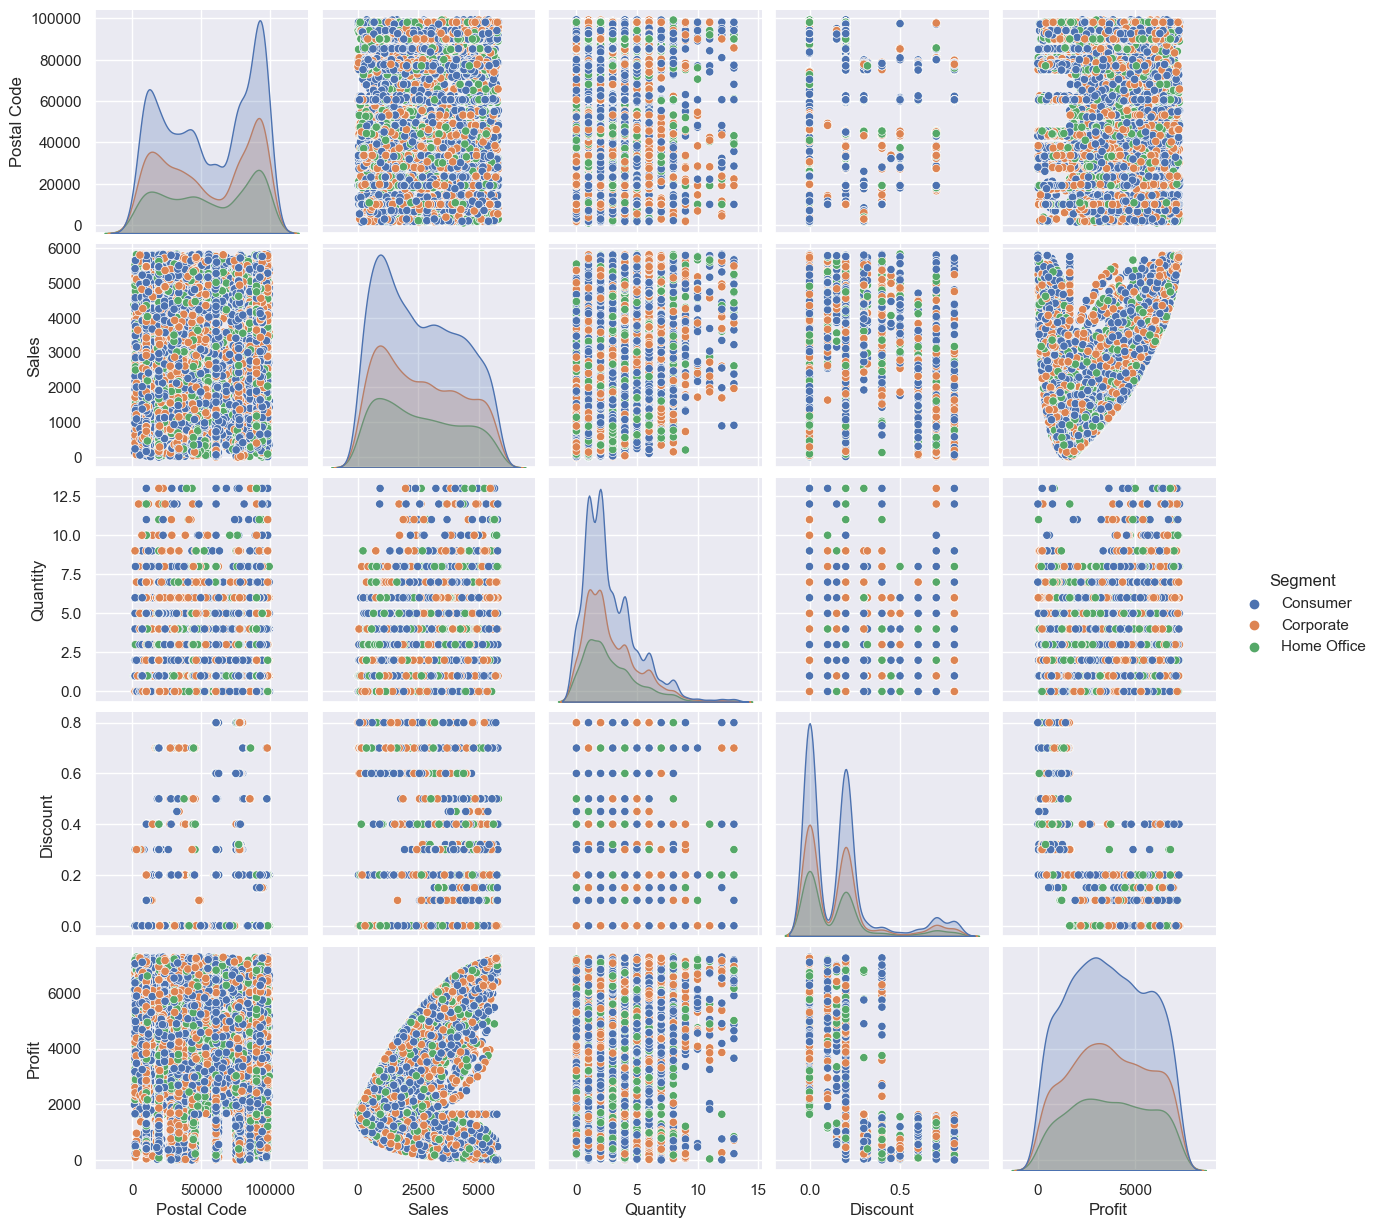

In [501]:
sns.pairplot(df, hue='Segment')

<Axes: xlabel='Segment', ylabel='count'>

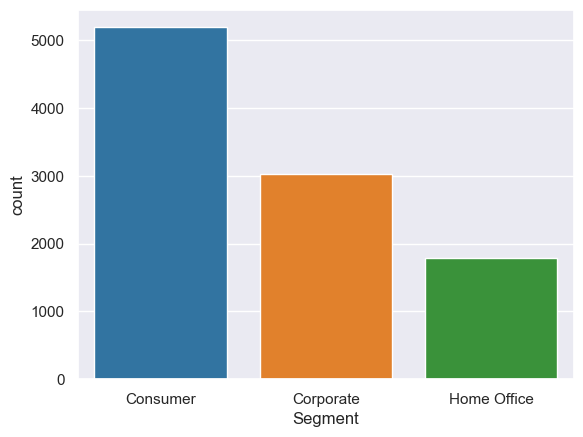

In [502]:
sns.countplot(x='Segment', data=df, palette='tab10')

In [503]:
data_segment = df.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()

array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>,
       <Axes: ylabel='Discount'>], dtype=object)

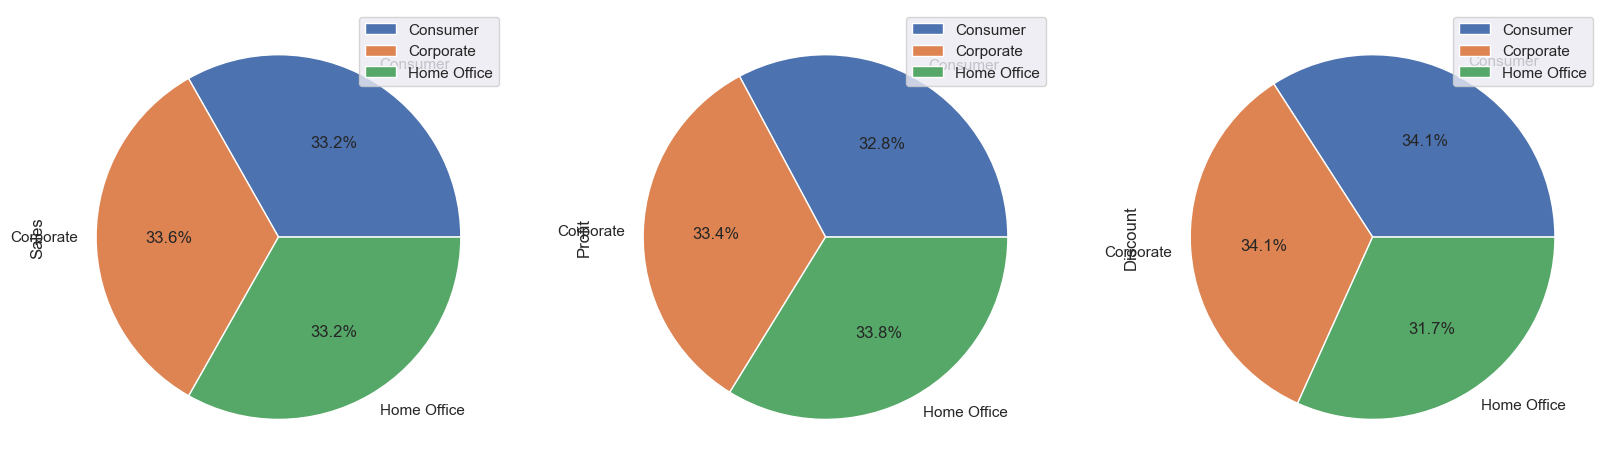

In [504]:
data_segment.plot.pie(subplots=True, figsize=(20,10), labels=data_segment.index, autopct='%1.1f%%')

<Axes: xlabel='Segment'>

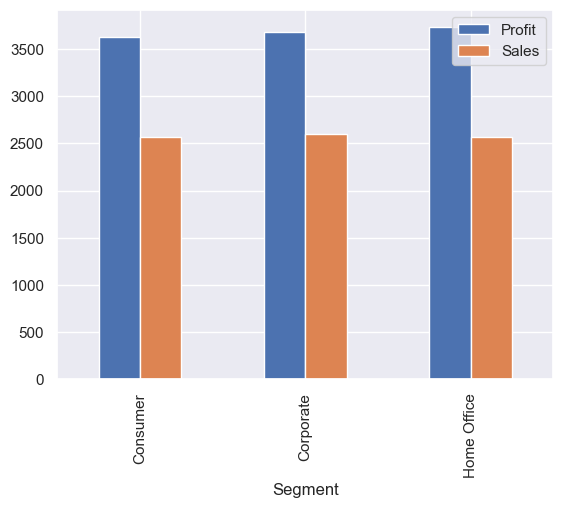

In [505]:
data_segment.sort_values('Profit')[['Profit','Sales']].plot(kind='bar')

In [506]:
data_segment.sum(axis=0)



Sales        7729.358760
Profit      11033.952466
Discount        0.463498
dtype: float64

In [507]:
data_segment['Sales%'] = data_segment['Sales']/6.985
data_segment['Profit%'] = data_segment['Profit']/0.9011
data_segment.sort_values('Profit')

,Sales,Profit,Discount,Sales%,Profit%
Segment,,,,,
Consumer,2567.130033,3621.156810,0.158141,367.520406,4018.595949
Corporate,2597.233775,3683.811921,0.158228,371.830175,4088.127756
Home Office,2564.994952,3728.983735,0.147128,367.214739,4138.257391


Sales
Lowest sales: Consumer(32.03%)

Highest sales: Home Office(34.50%)

Profit
Lowest profit: Consumer(28.67%)

Highest profit: Home Office(37.53%)

Though there is very little differences between the classes, still, maximum and minimum can be ascertained on seeing these analysis. The corporates are on the second position for both sales an profits with Home office leading the drive in the best way for the company

# Analysis based on State

In [508]:
data_state = df.groupby(['State'])[['Sales','Profit','Discount']].mean()
data_state1 = data_state.sort_values('Profit')
data_state2 = data_state.sort_values('Sales')


<Axes: xlabel='State'>

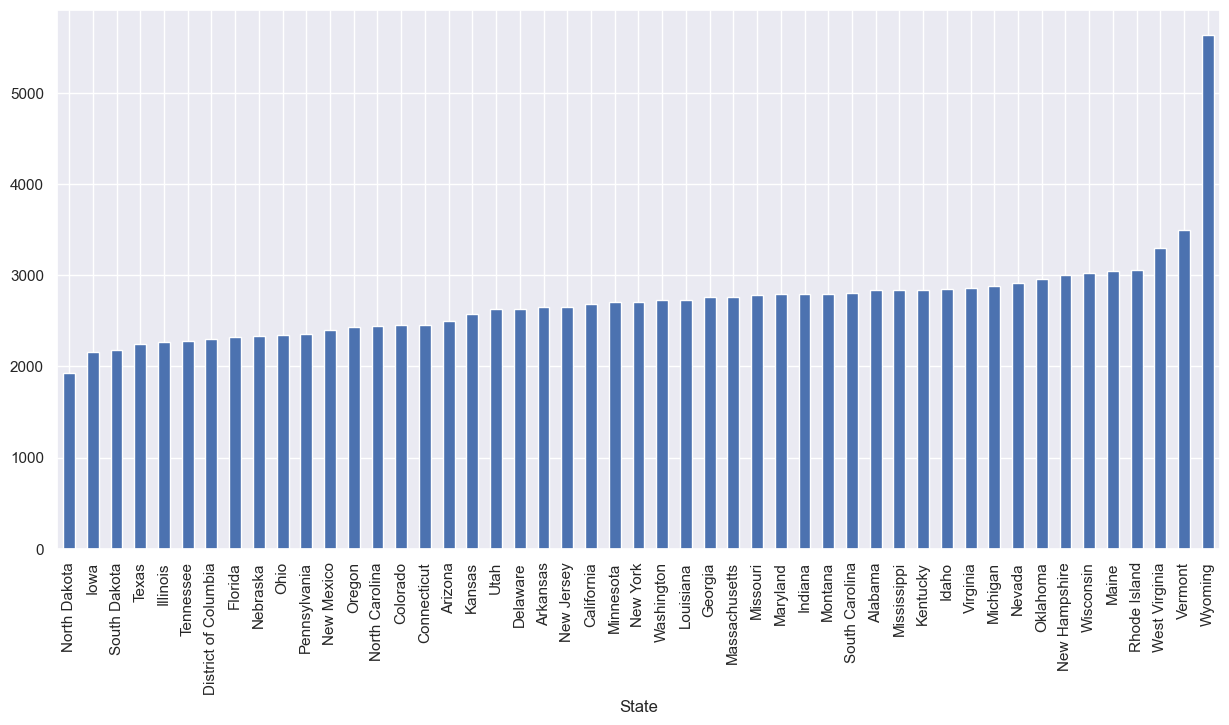

In [509]:
data_state2['Sales'].plot(kind='bar', figsize=(15,7))

<Axes: xlabel='State'>

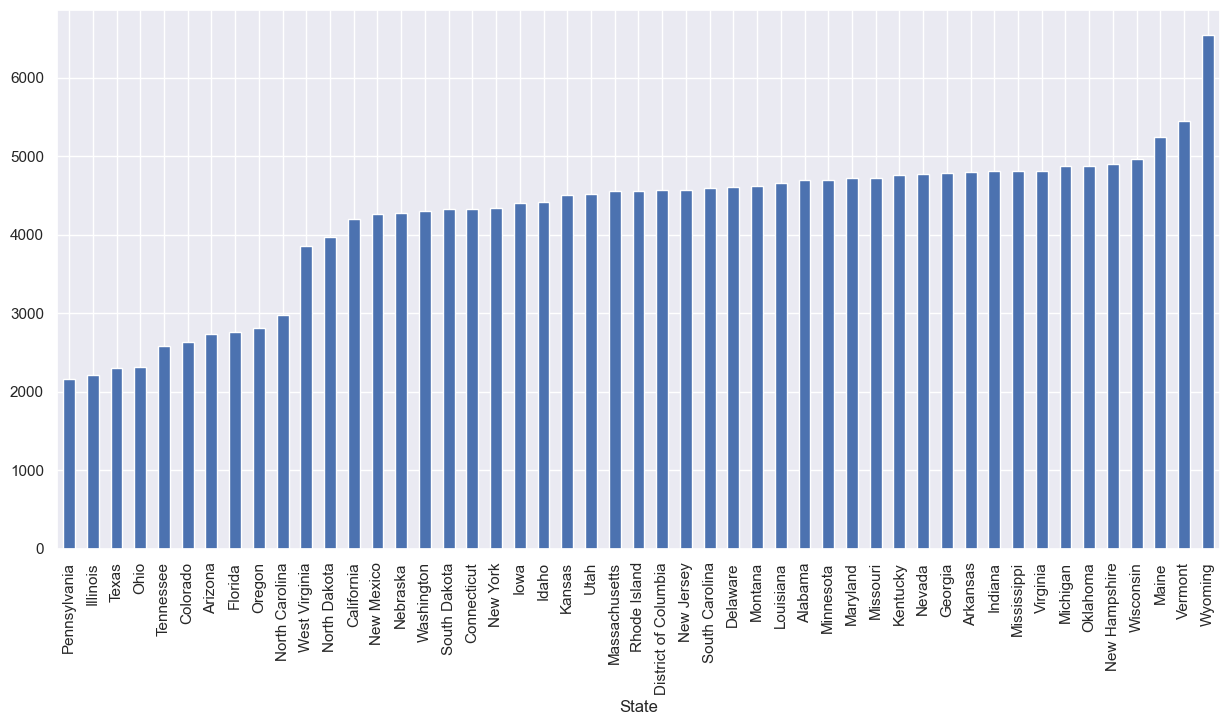

In [510]:
data_state1['Profit'].plot(kind='bar', figsize=(15,7))

<Axes: xlabel='State'>

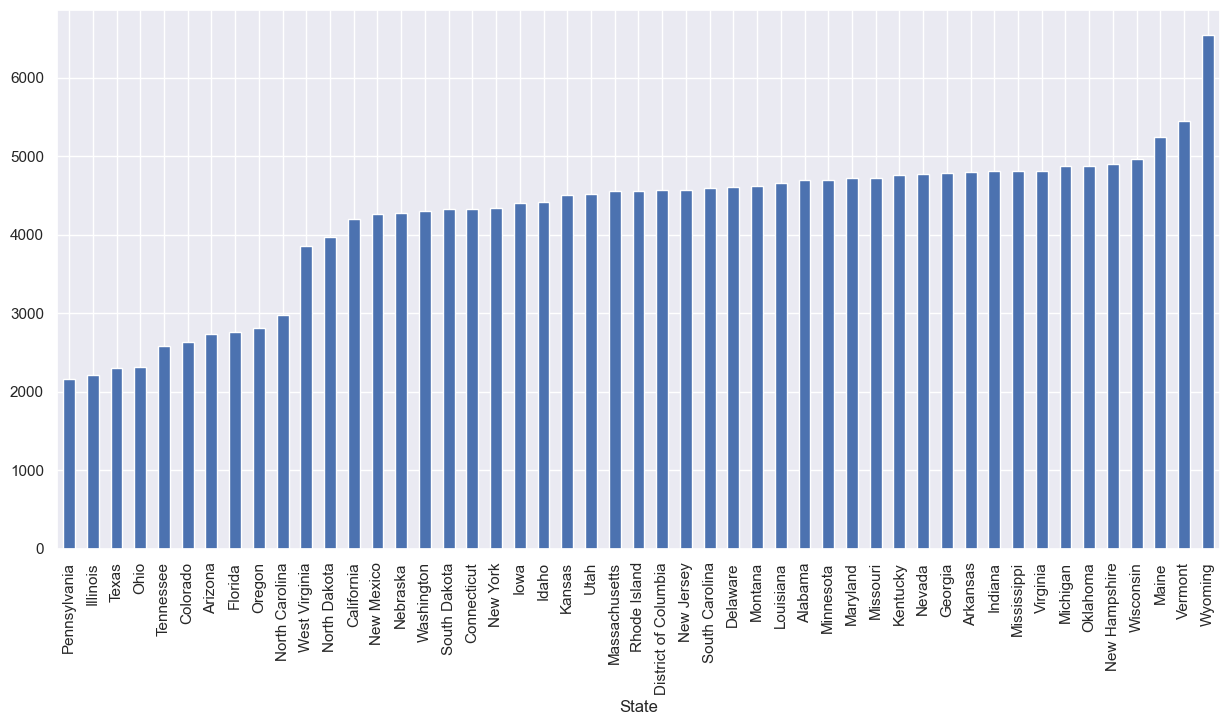

In [511]:
data_state.sort_values('Profit')['Profit'].plot(kind='bar', figsize=(15,7))

<Axes: xlabel='State'>

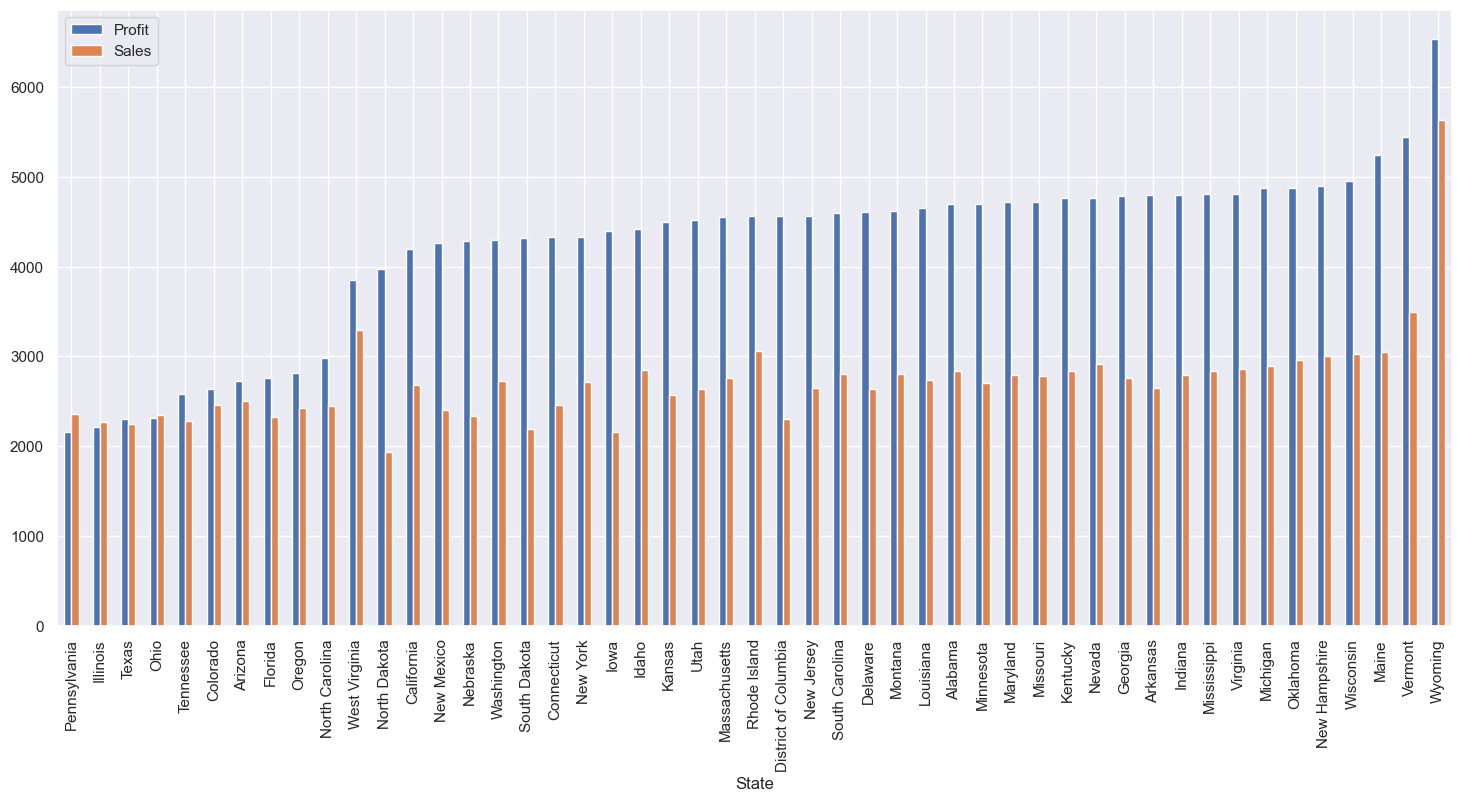

In [512]:
data_state.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

In [513]:
data_state.sum(axis=0)

Sales       133187.296197
Profit      207149.777351
Discount         4.076625
dtype: float64

In [514]:
data_state['Sales%'] = data_state['Sales']/135.454
data_state['Profit%'] = data_state['Profit']/26.483
data_state.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
State,,,,,
Pennsylvania,2359.897785,2163.293015,0.328620,17.422134,81.686101
Illinois,2269.656504,2215.859756,0.390041,16.755921,83.671025
Texas,2249.386802,2299.549239,0.370193,16.606278,86.831146
Ohio,2350.882729,2316.123667,0.324947,17.355580,87.456998
Tennessee,2274.885246,2582.196721,0.291257,16.794522,97.503935
Colorado,2454.230769,2636.483516,0.316484,18.118555,99.553809
Arizona,2502.584821,2731.187500,0.303571,18.475533,103.129838
Florida,2323.819843,2760.770235,0.299347,17.155786,104.246884
Oregon,2428.991935,2814.524194,0.288710,17.932227,106.276638


Sales
Lowest sale: South Dakota(0.81%)

Highest sale: Wyoming(11.84%)

The company should focus on improving their sales in South dakota, kansas, new mexico, north dakota, oregon and few more states whose share in sales is miniscule
Profit
Lowest profit: Ohio(-1.4%)

Highest profit: Vermont(7.7%)

The company must ascertain reasons why 10 states are leading to a loss with Ohio leading the charts. Either the faults must be corrected or considering the present situation, if the company isn't able to come to the break-even point, the operations must be discontinued.

# Analysis based on Region

In [515]:
data_region2 = df.groupby(['Region'])[['Sales','Profit']].mean()
data_region2

,Sales,Profit
Region,,
Central,2451.141197,3182.918209
East,2584.642556,3615.508427
South,2576.630864,3771.245062
West,2658.070247,3987.202935


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>], dtype=object)

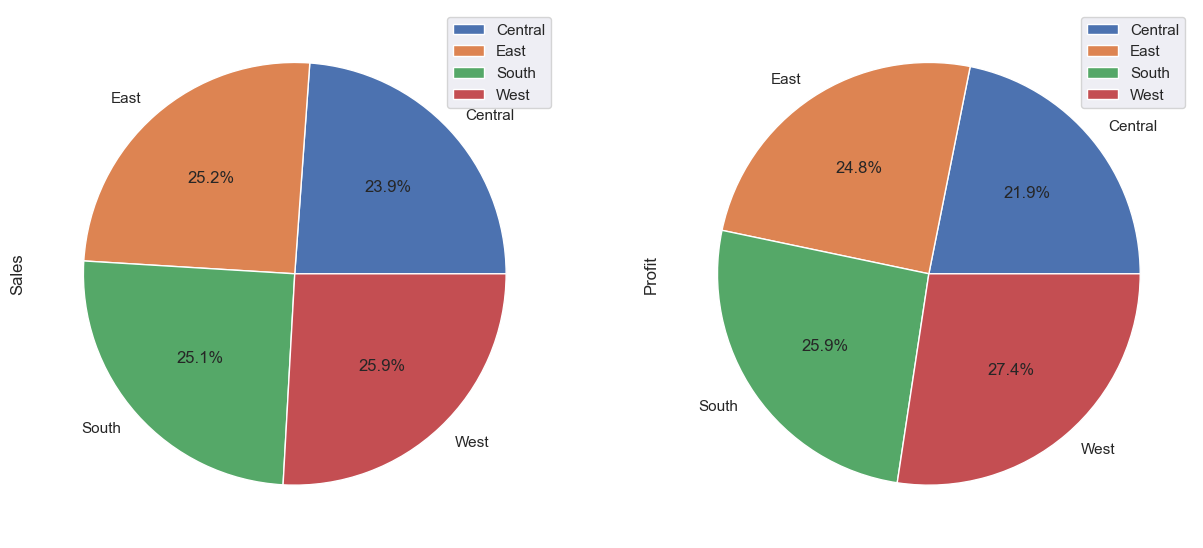

In [516]:
data_region2.plot.pie(subplots=True, figsize=(15,7), autopct='%1.1f%%', label=data_region2.index.values)

In [517]:
data_region2.sum(axis=0)

Sales     10270.484864
Profit    14556.874633
dtype: float64

In [518]:
data_region2['Sales%'] = data_region2['Sales']/9.224
data_region2['Profit%'] = data_region2['Profit']/1.119
data_region2.sort_values('Profit')

,Sales,Profit,Sales%,Profit%
Region,,,,
Central,2451.141197,3182.918209,265.735169,2844.430929
East,2584.642556,3615.508427,280.208430,3231.017361
South,2576.630864,3771.245062,279.339860,3370.192191
West,2658.070247,3987.202935,288.168934,3563.184035


Sales
Lowest sales: Central(23.40%)

Highest sales: South(26.21%)

The sales seem fine in all the regions since the variation range is less, however steps can still be taken to improve the sales in Central zone.
Profit
Lowest profit: Central(15.27%)

Highest profit: West(30.25%)

The profits have to be looked at since the West zone is giving almost double the profit as compared to the central one, so the company will have to take steps to analyze the shortcoming in terms of both sales and profits for the central region

# Analysis of Sub Category

Sales of sub category

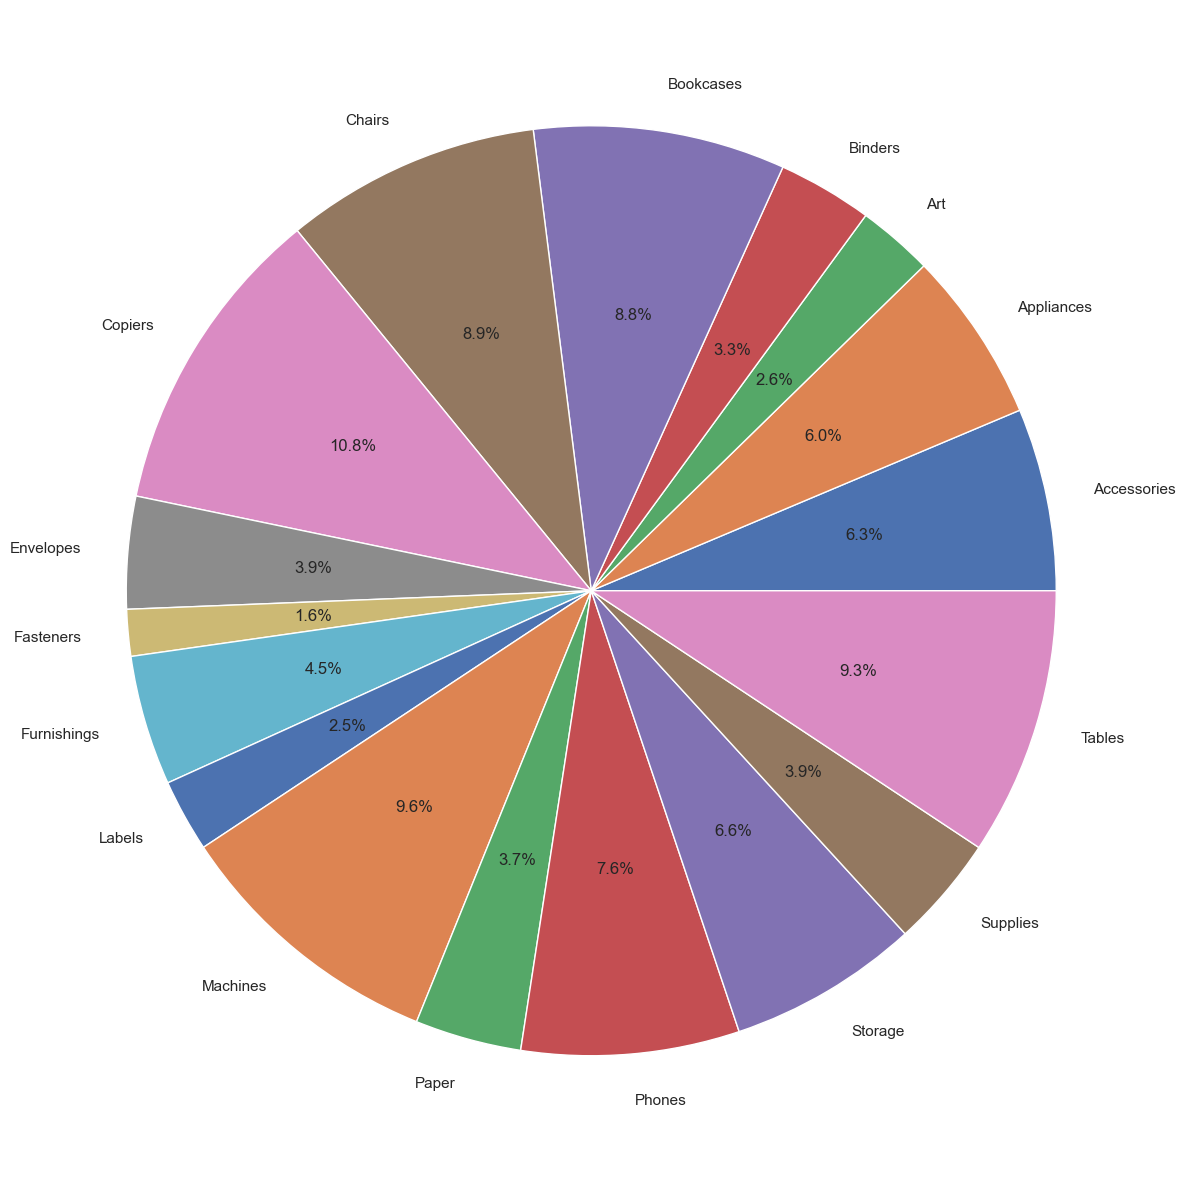

In [519]:
data_subcat = df.groupby(['Sub-Category'])[['Sales','Profit']].mean()
plt.figure(figsize=(15,18))
plt.pie(data_subcat['Sales'], labels = data_subcat.index, autopct='%1.1f%%')
plt.show()

profits for sub category

<Axes: xlabel='Sub-Category'>

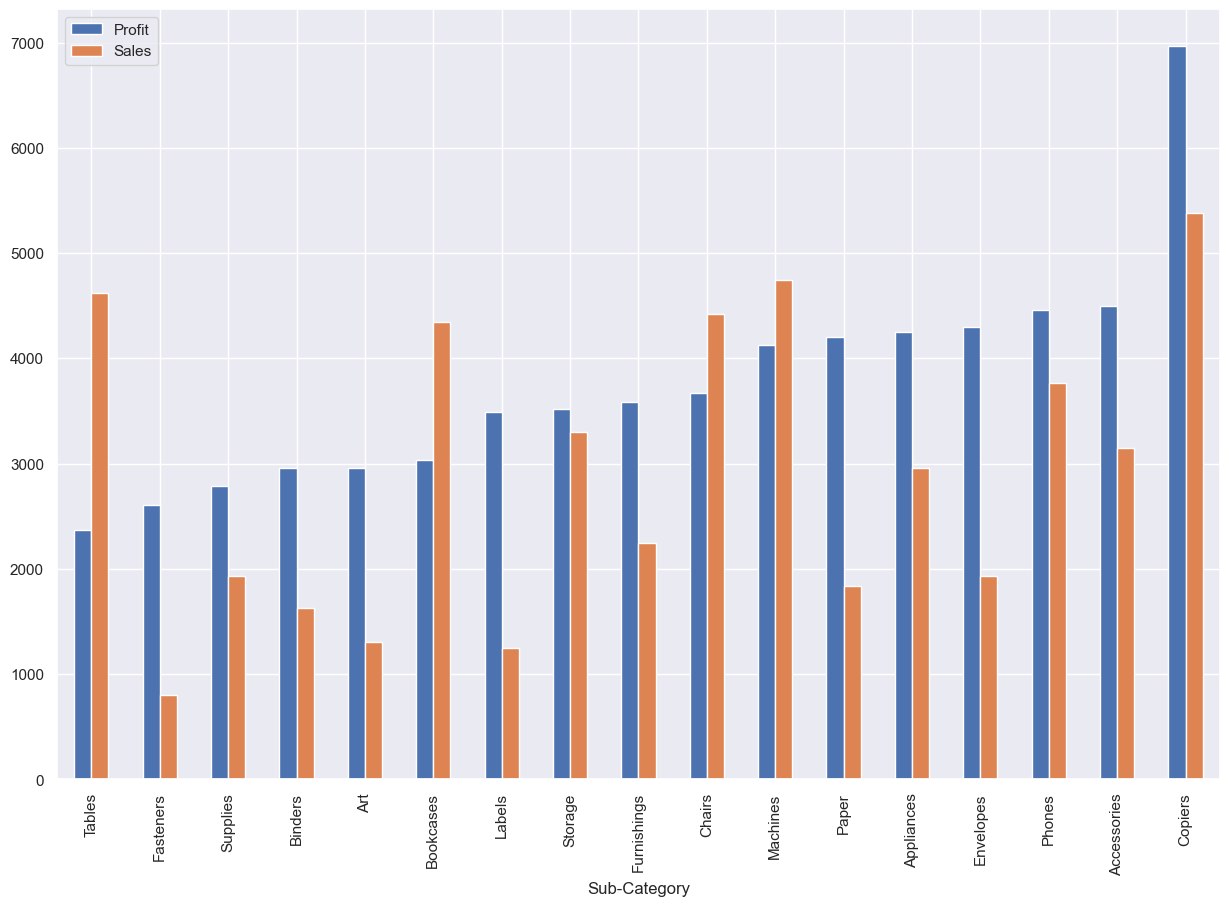

In [520]:
data_subcat.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(15,10))

In [521]:
data_subcat.sum(axis=0)

Sales     49636.770594
Profit    63777.875467
dtype: float64

In [522]:
data_subcat['Sales%'] = data_subcat['Sales']/72.915
data_subcat['Profit%'] = data_subcat['Profit']/10.952
data_subcat.sort_values('Sales')

,Sales,Profit,Sales%,Profit%
Sub-Category,,,,
Fasteners,805.119816,2608.207373,11.041896,238.148957
Labels,1252.848901,3486.233516,17.182321,318.319350
Art,1308.508794,2958.554020,17.945674,270.138241
Binders,1632.439265,2955.857518,22.388250,269.892031
Paper,1837.678832,4202.154015,25.203029,383.688277
Supplies,1932.984211,2787.810526,26.510104,254.548076
Envelopes,1937.405512,4296.314961,26.570740,392.285880
Furnishings,2244.101358,3586.809822,30.776951,327.502723
Appliances,2961.738197,4255.708155,40.619052,388.578173


Sales
Lowest sales: Fasteners(0.2%)

Highest sales: Copiers(30.2%)

Profit
Lowest profit: Tables(-55.6%)

Highest profit: Copiers(74.7%)

Looking at the statistical figures, the company must have the main function in copiers since the sales and profits are heavily influenced by copiers.
The company must discontinue the sales of tables since it is contributing to a heavy loss and steps could be taken to improve profits for other sub categories

# EDA ENDS


In [523]:
col_list = ['Sales','Quantity','Profit']

In [524]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [525]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,4205,1,0.00,5740
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,5219,2,0.00,6962
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,969,1,0.00,3301
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,5392,4,0.45,75
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,1360,1,0.20,2257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,1482,2,0.20,2684
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,3029,1,0.00,4467
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,4193,1,0.20,4766
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,1644,3,0.00,4244


# Train test split

In [526]:
from sklearn.model_selection import train_test_split

In [527]:
X = df[['Sales', 'Quantity', 'Discount','Profit' ]]

In [528]:
y = df['Profit']

In [529]:
x

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,4205,1,0.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,5219,2,0.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,969,1,0.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,5392,4,0.45
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,1360,1,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,1482,2,0.20
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,3029,1,0.00
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,4193,1,0.20
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,1644,3,0.00


In [530]:
y

0       5740
1       6962
2       3301
3         75
4       2257
        ... 
9989    2684
9990    4467
9991    4766
9992    4244
9993    6270
Name: Profit, Length: 9994, dtype: int64

In [531]:
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.40)

# Decision tree 


In [532]:
clf = DecisionTreeClassifier(min_samples_split = 700)

In [533]:
clf = clf.fit(X, y)

In [534]:
clf

DecisionTreeClassifier(min_samples_split=700)

In [535]:

X

,Sales,Quantity,Discount,Profit
0,4205,1,0.00,5740
1,5219,2,0.00,6962
2,969,1,0.00,3301
3,5392,4,0.45,75
4,1360,1,0.20,2257
...,...,...,...,...
9989,1482,2,0.20,2684
9990,3029,1,0.00,4467
9991,4193,1,0.20,4766
9992,1644,3,0.00,4244


[Text(0.3010752688172043, 0.9814814814814815, 'x[0] <= 1024.5\ngini = 1.0\nsamples = 9994\nvalue = [1, 1, 1 ... 1, 1, 1]'),
 Text(0.25806451612903225, 0.9444444444444444, 'x[0] <= 1023.5\ngini = 0.998\nsamples = 2301\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.23655913978494625, 0.9074074074074074, 'x[3] <= 3168.5\ngini = 0.998\nsamples = 2262\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.21505376344086022, 0.8703703703703703, 'x[3] <= 2553.5\ngini = 0.999\nsamples = 2103\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.1935483870967742, 0.8333333333333334, 'x[3] <= 2409.5\ngini = 0.999\nsamples = 1581\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.17204301075268819, 0.7962962962962963, 'x[3] <= 2369.5\ngini = 0.999\nsamples = 1399\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.15053763440860216, 0.7592592592592593, 'x[3] <= 2345.5\ngini = 0.999\nsamples = 1343\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.12903225806451613, 0.7222222222222222, 'x[3] <= 2336.0\ngini = 0.999\nsamples = 1308\nvalue = [0, 0, 0 ... 

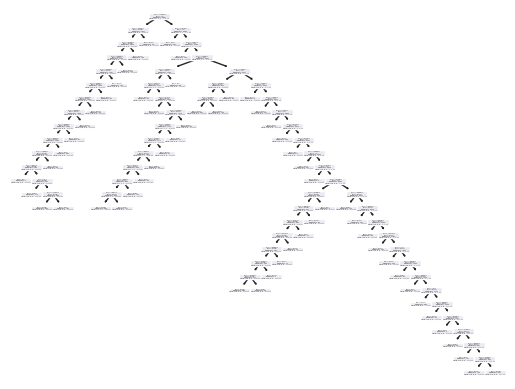

In [536]:
tree.plot_tree(clf)

# Looking at the train accuracy

In [537]:
from sklearn.metrics import accuracy_score

In [538]:
train_pred = clf.predict(X)
train_acc = accuracy_score(y, train_pred)
train_acc

0.05223133880328197

In [539]:
train_pred

array([6120, 6796, 3169, ..., 5000, 4149, 6120])

# Thank You!!